# Task 7.4: Supervised Machine Learning: Regression

### This script contains the following points:

### 1. Define supervised machine learning
### 2. Differentiate between predictive analytics, machine learning, and predictive modeling
### 3. Conduct a regression analysis in Python and interpret the results

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Create folder path
path = r'C:\Users\Thor\OneDrive\Desktop\Career Foundry Tools\Projects\Project 7\Netflix'

In [3]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Original Data','IMDB', 'Movies 2010 clean.csv'))

In [13]:
df.dtypes

imdb_title_id              object
original_title             object
year                        int64
genre_1                    object
genre_2                    object
genre_3                    object
duration                    int64
country                    object
country_2                  object
language                   object
director                   object
director_2                 object
writer                     object
production_company         object
actors                     object
description                object
avg_vote                  float64
votes                       int64
budget                     object
usa_gross_income            int64
worldwide_gross_income      int64
metascore                   int64
reviews_from_users          int64
reviews_from_critics        int64
critical_reception         object
dtype: object

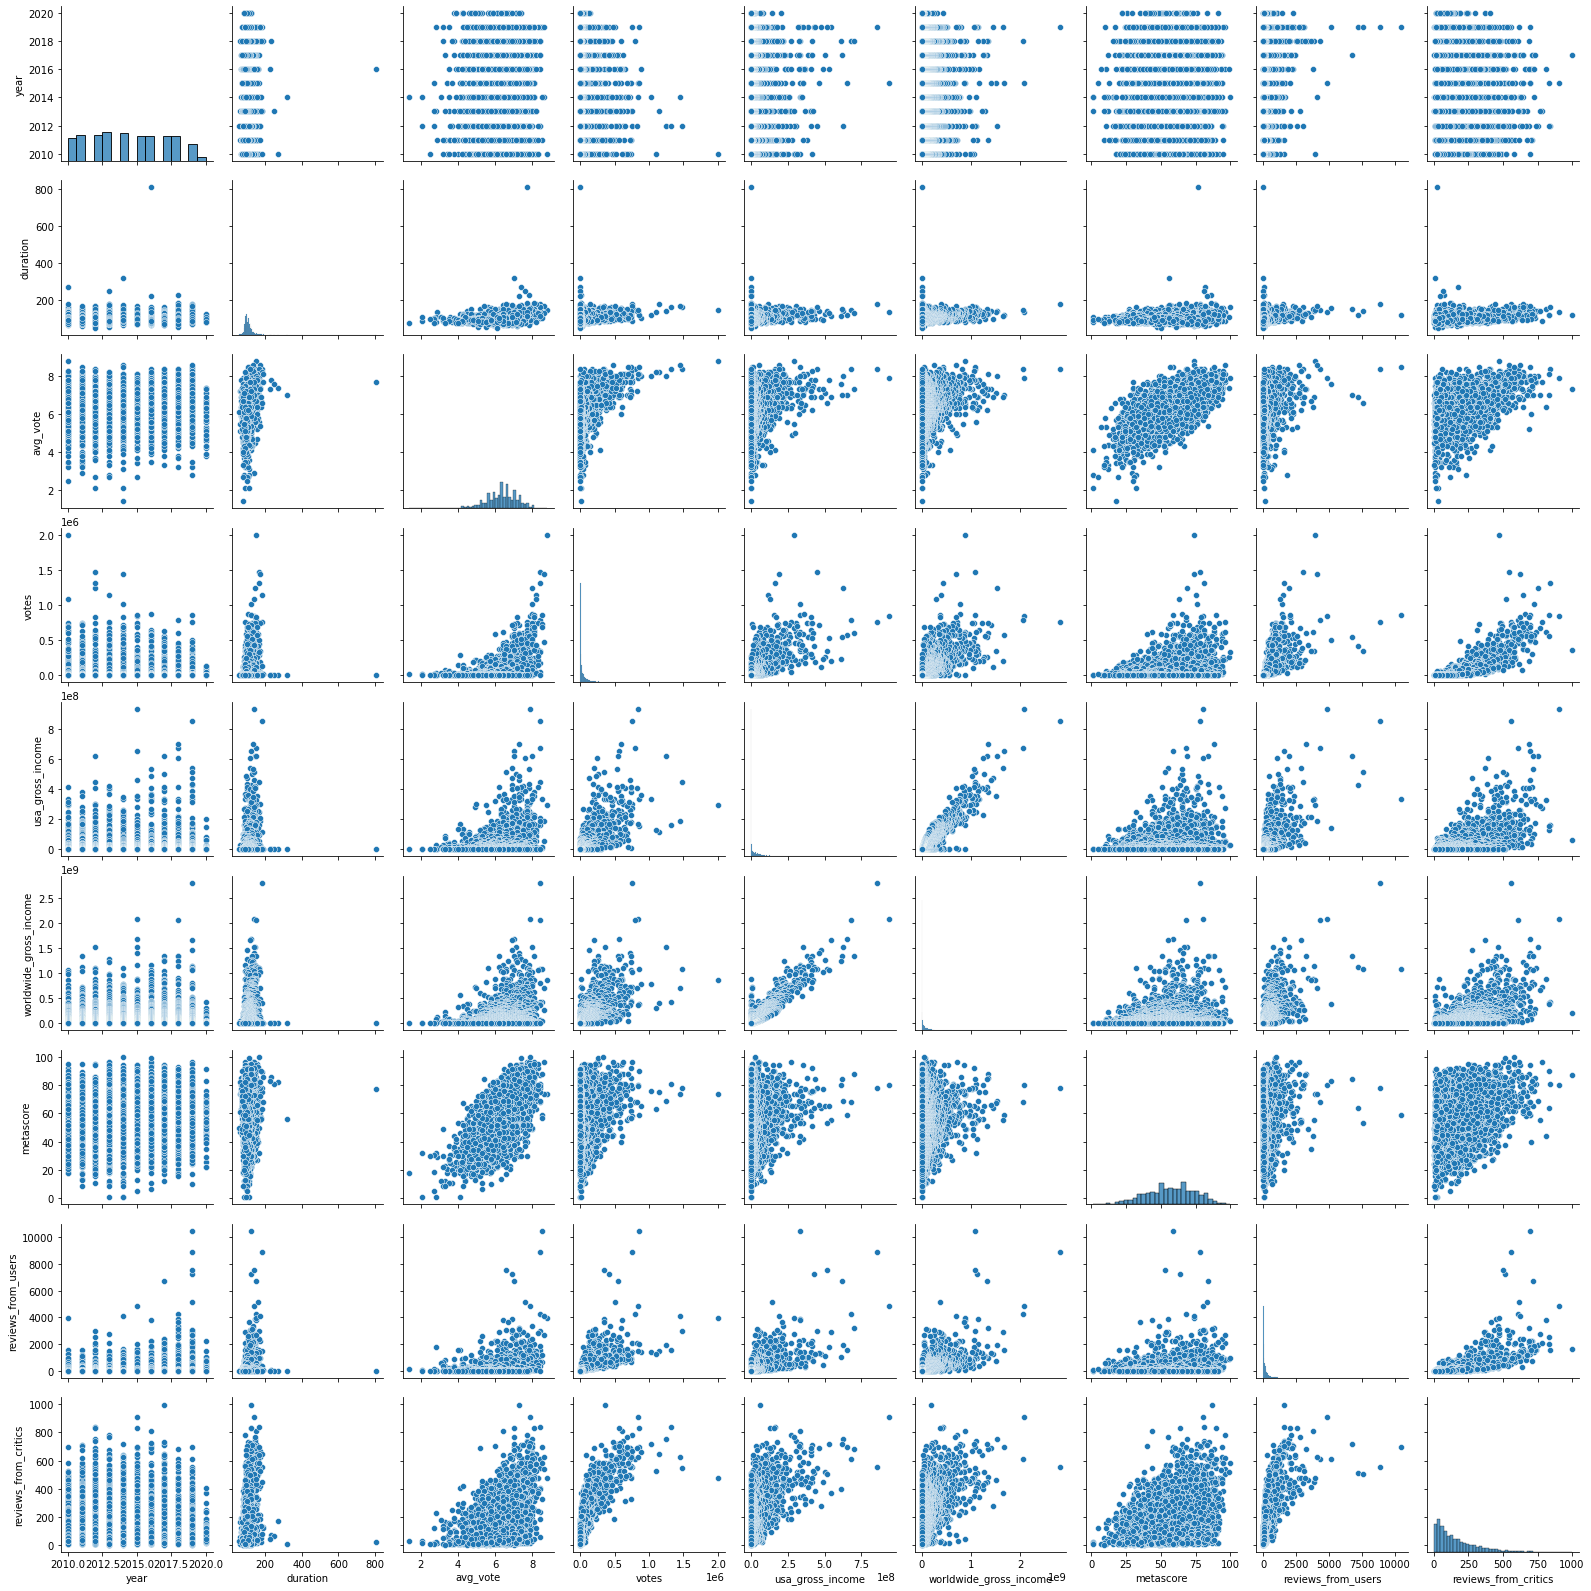

In [31]:
# Create a pair plot 

g = sns.pairplot(df)

## I have created a pair plot to get an overview of which variables create an interesting slope pattern. I will begin by looking at my hytpothesis of comparing the avg_vote from audiences on IMDB compared with the metacritic scores assigned to the same movie to see how much overlap there is. 

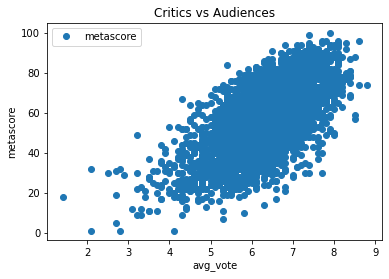

In [14]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'avg_vote', y='metascore',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Critics vs Audiences')  
plt.xlabel('avg_vote')  
plt.ylabel('metascore')  
plt.show()

In [15]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['avg_vote'].values.reshape(-1,1)
y = df['metascore'].values.reshape(-1,1)

In [16]:
X

array([[8.4],
       [7.9],
       [8.4],
       ...,
       [4. ],
       [6.2],
       [5.1]])

In [17]:
y

array([[78],
       [80],
       [68],
       ...,
       [30],
       [56],
       [59]], dtype=int64)

In [18]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [19]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [20]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [21]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

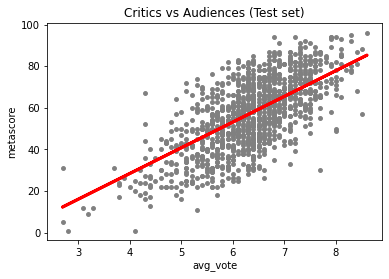

In [22]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Critics vs Audiences (Test set)')
plot_test.xlabel('avg_vote')
plot_test.ylabel('metascore')
plot_test.show()

In [23]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [24]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[12.37036082]]
Mean squared error:  160.8146638481845
R2 score:  0.46185066718135526


In [25]:
y_predicted

array([[66.70988232],
       [54.3395215 ],
       [70.42099057],
       ...,
       [53.10248542],
       [55.57655758],
       [66.70988232]])

In [26]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,60,66.709882
1,65,54.339521
2,73,70.420991
3,13,33.309908
4,60,46.917305
5,57,54.339521
6,48,53.102485
7,43,58.050630
8,81,74.132099
9,31,12.280295


In [27]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [28]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [29]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[12.37036082]]
Mean squared error:  164.43324680721042
R2 score:  0.4177137822018905


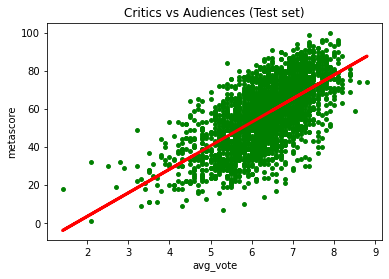

In [30]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Critics vs Audiences (Test set)')
plot_test.xlabel('avg_vote')
plot_test.ylabel('metascore')
plot_test.show()

## While there is definitely an upward slope between the critical metascore and audience votes, there are simply too many values outside the regression line to predict with a resonable certainty that critical reception will mean that audiences will respond in the same way. 

## Some potential bias is that critics don't usually go back and review movies after they are released whereas audiences are more likely to score a movie well after it comes out. It's possible that some movies might be hated when they come out, but over time people's perceptions change and votes will be more favorable. 